Coupon Redemption for Credit Card Campaign
==============

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Exploratory Data Analysis
## Load Data

In [4]:
data_path = '../data/Predicting Coupon Redemption'
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
demo_df = pd.read_csv(os.path.join(data_path, 'customer_demographics.csv'))
cmpn_df = pd.read_csv(os.path.join(data_path, 'campaign_data.csv'))
cp_it_df = pd.read_csv(os.path.join(data_path, 'coupon_item_mapping.csv'))
txn_df = pd.read_csv(os.path.join(data_path, 'customer_transaction_data.csv'))
item_df = pd.read_csv(os.path.join(data_path, 'item_data.csv'))

## Data Check
### Train data

In [5]:
colors = sns.color_palette("deep")

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [7]:
print("there are {} unique customers".format(train_df['customer_id'].nunique()))
print("there are {} unique campaigns".format(train_df['campaign_id'].nunique()))
print("there are {} unique coupons".format(train_df['coupon_id'].nunique()))

there are 1428 unique customers
there are 18 unique campaigns
there are 866 unique coupons


### Demographics

In [8]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [9]:
join_demo_df = train_df.merge(demo_df, on='customer_id', how='left')
join_demo_df.shape

(78369, 11)

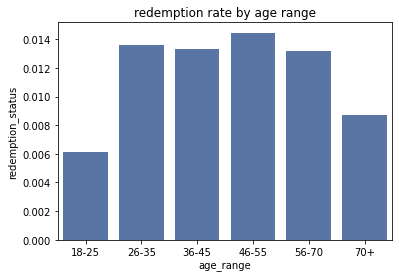

In [10]:
join_demo_df.groupby('age_range').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='age_range', y='redemption_status', color=colors[0])
plt.title('redemption rate by age range')
plt.show()

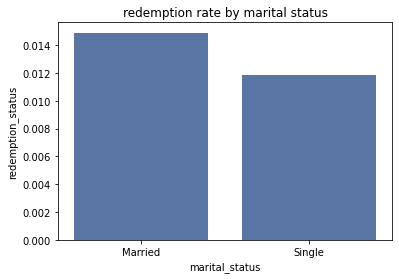

In [11]:
join_demo_df.groupby('marital_status').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='marital_status', y='redemption_status', color=colors[0])
plt.title('redemption rate by marital status')
plt.show()

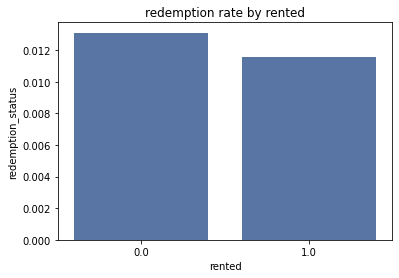

In [12]:
join_demo_df.groupby('rented').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='rented', y='redemption_status', color=colors[0])
plt.title('redemption rate by rented')
plt.show()

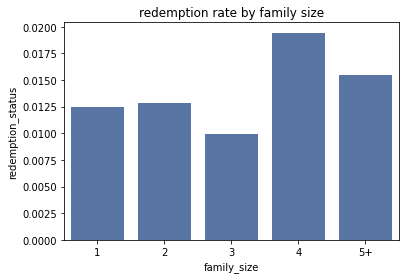

In [13]:
join_demo_df.groupby('family_size').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='family_size', y='redemption_status', color=colors[0])
plt.title('redemption rate by family size')
plt.show()

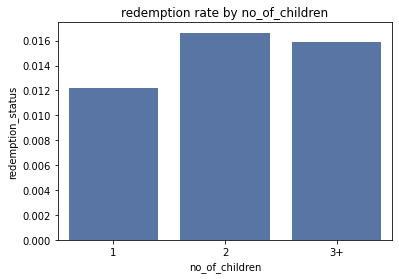

In [14]:
join_demo_df.groupby('no_of_children').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='no_of_children', y='redemption_status', color=colors[0])
plt.title('redemption rate by no_of_children')
plt.show()

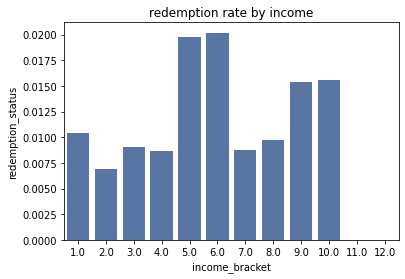

In [15]:
join_demo_df.groupby('income_bracket').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='income_bracket', y='redemption_status', color=colors[0])
plt.title('redemption rate by income')
plt.show()

### Campaign Data

In [16]:
cmpn_df['start_date'] = cmpn_df['start_date'].apply(pd.to_datetime)
cmpn_df['end_date'] = cmpn_df['end_date'].apply(pd.to_datetime)
cmpn_df['campaign_duration'] = (cmpn_df['end_date'] - cmpn_df['start_date']).astype('timedelta64[D]').astype(int)

In [17]:
cmpn_df[cmpn_df['campaign_duration']<0]

,campaign_id,campaign_type,start_date,end_date,campaign_duration
6,18,X,2013-10-08,2013-04-10,-181
10,13,X,2013-05-19,2013-05-07,-12
17,6,Y,2013-01-28,2013-01-03,-25
19,5,Y,2013-12-01,2013-02-15,-289
27,26,X,2012-12-08,2012-09-21,-78


In [18]:
print("total unique campaign ids are ", cmpn_df['campaign_id'].nunique())
print("total unique campaign types are ", cmpn_df['campaign_type'].nunique())

total unique campaign ids are  28
total unique campaign types are  2


In [19]:
cmpn_data = train_df.merge(cmpn_df, on='campaign_id', how='left')
print('campaign data: ', cmpn_df.shape[0])
print('train data: ', train_df.shape[0])
print('join data: ', cmpn_data.shape[0])

campaign data:  28
train data:  78369
join data:  78369


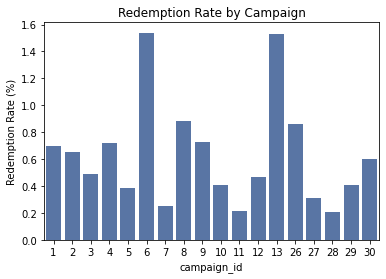

In [20]:
campaign_conversion = train_df.groupby('campaign_id').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion.rename({'redemption_status': 'redemption_rate'}, inplace=True, axis=1)
campaign_conversion['redemption_rate'] = campaign_conversion['redemption_rate']*100
sns.barplot(data=campaign_conversion, y='redemption_rate', x='campaign_id', color=colors[0])
plt.ylabel('Redemption Rate (%)')
plt.title("Redemption Rate by Campaign")
plt.show()

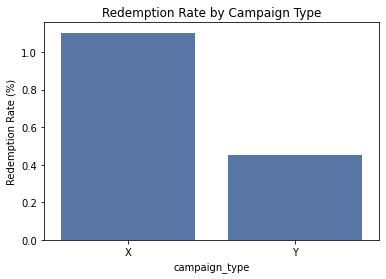

In [21]:
campaign_conversion = cmpn_data.groupby('campaign_type').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion.rename({'redemption_status': 'redemption_rate'}, inplace=True, axis=1)
campaign_conversion['redemption_rate'] = campaign_conversion['redemption_rate']*100
sns.barplot(data=campaign_conversion, y='redemption_rate', x='campaign_type', color=colors[0])
plt.ylabel('Redemption Rate (%)')
plt.title("Redemption Rate by Campaign Type")
plt.show()

<AxesSubplot:xlabel='duration_bin', ylabel='redemption_status'>

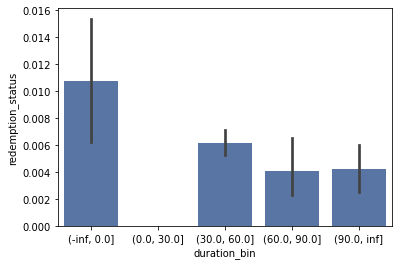

In [22]:
campaign_conversion = cmpn_data.groupby('campaign_duration').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion['duration_bin'] = pd.cut(campaign_conversion['campaign_duration'], [-np.Inf, 0, 30, 60, 90, np.Inf])
sns.barplot(data=campaign_conversion, x='duration_bin', y='redemption_status', color=colors[0])

### Coupon and Item

In [23]:
cp_it_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [24]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [25]:
print("total unique items are", item_df['item_id'].nunique())
print("total unique brands are", item_df['brand'].nunique())
print("total unique brand types are", item_df['brand_type'].nunique())
print("total unique categories are", item_df['category'].nunique())

total unique items are 74066
total unique brands are 5528
total unique brand types are 2
total unique categories are 19


In [26]:
coupon_df = cp_it_df.merge(item_df, on='item_id', how='left')
coupon_df.shape

(92663, 5)

In [27]:
coupon_df.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [28]:
agg_coupon_df = coupon_df.groupby('coupon_id').agg({'item_id': 'unique', 'category': 'unique', 'brand_type': 'unique', 'brand': 'unique'} )
agg_coupon_df['n_items'] = agg_coupon_df['item_id'].str.len()
agg_coupon_df['n_categories'] = agg_coupon_df['category'].str.len()
agg_coupon_df['n_brand_types'] = agg_coupon_df['brand_type'].str.len()
agg_coupon_df['n_brands'] = agg_coupon_df['brand'].str.len()
agg_coupon_df['brand_type'] = agg_coupon_df['brand_type'].apply(np.sort)
agg_coupon_df['brand_type'] = agg_coupon_df['brand_type'].str.join("/")
agg_coupon_df.head()

,item_id,category,brand_type,brand,n_items,n_categories,n_brand_types,n_brands
coupon_id,,,,,,,,
1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...","[Natural Products, Grocery]",Established,"[4700, 1475, 1558]",39,2,1,3
2,"[2581, 12901]",[Grocery],Established,[2084],2,1,1,1
3,"[58906, 58943, 58944, 58946, 58964, 58972, 590...",[Grocery],Established,"[1558, 278]",17,1,1,2
4,"[36772, 51649, 51212, 51221, 51243, 51598, 528...",[Grocery],Established,[544],24,1,1,1
5,"[57118, 53496, 57079, 46144, 46006, 44994, 57016]",[Pharmaceutical],Established,[5357],7,1,1,1


In [29]:
join_df = train_df.merge(agg_coupon_df, on='coupon_id', how='left')

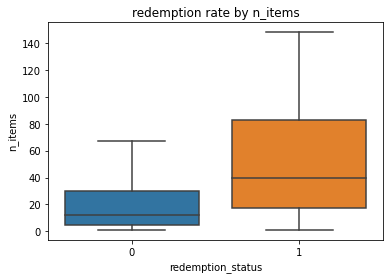

In [30]:
sns.boxplot(data=join_df, x='redemption_status', y='n_items', showfliers=False)
plt.title('redemption rate by n_items')
plt.show()

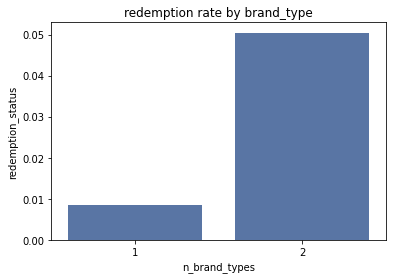

In [31]:
join_df.groupby('n_brand_types').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='n_brand_types', y='redemption_status', color=colors[0])
plt.title('redemption rate by brand_type')
plt.show()

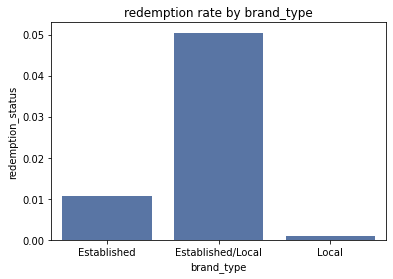

In [32]:
join_df.groupby('brand_type').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='brand_type', y='redemption_status', color=colors[0])
plt.title('redemption rate by brand_type')
plt.show()

### Transaction Data

In [39]:
txn_df.shape

(1324566, 7)

In [38]:
txn_df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [34]:
cmpn_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_duration
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,-12
1,2,13,116,48,0,X,2013-05-19,2013-05-07,-12
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,-12
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77


In [53]:
txn_df['date'] = txn_df['date'].apply(pd.to_datetime)
join_txn = cmpn_data[['campaign_id', 'customer_id', 'start_date', 'end_date']].merge(txn_df, on='customer_id', how='left')
join_txn = join_txn[~join_txn.duplicated()]

In [65]:
join_txn['date_diff'] = (join_txn['start_date'] - join_txn['date']).dt.days

In [67]:
join_txn.head()

,campaign_id,customer_id,start_date,end_date,date,item_id,quantity,selling_price,other_discount,coupon_discount,date_diff
0,13,1053,2013-05-19,2013-05-07,2012-01-10,14458,1,320.22,0.00,0.0,495
1,13,1053,2013-05-19,2013-05-07,2012-01-10,16621,1,89.05,-10.33,0.0,495
2,13,1053,2013-05-19,2013-05-07,2012-01-10,47950,1,99.38,-42.74,0.0,495
3,13,1053,2013-05-19,2013-05-07,2012-01-10,24957,2,99.02,0.00,0.0,495
4,13,1053,2013-05-19,2013-05-07,2012-02-04,7570,2,99.02,0.00,0.0,470
